<a href="https://colab.research.google.com/github/VesalAhsani/Driver-behavior-detection/blob/main/yolov8_day_no_safedriving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is trained after removing SafeDriving class to only focus on abnormal behaviors of a driver.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.path.exists('/content/drive/MyDrive/Day_C123.zip'))

True


In [3]:
import zipfile
zip_path = '/content/drive/MyDrive/Day_C123.zip'
extract_path = '/content/day-c123'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [4]:
import os
import shutil

# Define the base path to the dataset
dataset_path = '/content/day-c123/Day_C123'  # Update if your extracted path is different

# Define subdirectories to clean
subdirs = ['train', 'val', 'test']

# Define the class to remove
class_to_remove = 'SafeDriving'

# Loop through each subdirectory and remove the class folder
for subdir in subdirs:
    class_path = os.path.join(dataset_path, subdir, class_to_remove)
    if os.path.exists(class_path):
        print(f"Removing folder: {class_path}")
        shutil.rmtree(class_path)
    else:
        print(f"Class folder not found: {class_path}")

print("SafeDriving class removed from train, val, and test folders!")

Removing folder: /content/day-c123/Day_C123/train/SafeDriving
Removing folder: /content/day-c123/Day_C123/val/SafeDriving
Removing folder: /content/day-c123/Day_C123/test/SafeDriving
SafeDriving class removed from train, val, and test folders!


In [5]:
!pip install ultralytics --upgrade

from ultralytics import YOLO
print("Ultralytics library imported successfully!")

from ultralytics.data.utils import check_cls_dataset

# Pass the directory containing the dataset, not the YAML file
dataset = check_cls_dataset("/content/day-c123/Day_C123")
print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 25.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics library imported successfully!
train: /content/day-c123/Day_C123/train... found 170136 images in 5 classes ✅ 
val: /content/day-c123/Day_C123/val... found 16027 images in 5 classes ✅ 
test: /content/day-c123/Day_C123/test... found 16031 images in 5 classes ✅ 
{'train': PosixPath('/content/day-c123/Day_C123/train'), 'val': PosixPath('/content/day-c123/Day_C123/val'), 'test': PosixPath('/content/day-c123/Day_C123/test'), 'nc': 5, 'names': {0: 'Distraction', 1: 'EatingDrinking', 2: 'PhoneUsage', 3: 'Sleepy', 4: 'Smoking'}}


In [6]:
import glob

train_images = glob.glob("/content/day-c123/Day_C123/train/*/*.jpg")
val_images = glob.glob("/content/day-c123/Day_C123/val/*/*.jpg")

print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(val_images)}")

Number of training images: 170136
Number of validation images: 16027


In [7]:
from ultralytics import YOLO
import torch
import torch.nn as nn

# Define custom class weights
class_weights = torch.tensor([1.0, 3.5, 2.5, 3.5, 3.5]).to('cuda')  # Adjusted weights

# Custom weighted loss function
def custom_loss(pred, target):
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return criterion(pred, target)

# Load YOLOv8 classification model
model = YOLO("yolov8n-cls.pt")  # Use a pre-trained YOLOv8 classification model

# Attach the custom loss function
model.model.criterion = custom_loss  # Override default loss with weighted loss

# Train the model
model.train(
    data="/content/day-c123/Day_C123",  # Path to the dataset
    epochs=50,                          # Adjust epochs as needed
    batch=32,                           # Batch size
    imgsz=224,                          # Image size
    name="yolov8_day_no_safedriving",   # Run name
    optimizer="Adam",                   # Optimizer
    lr0=0.001,                          # Learning rate
    cos_lr=True,                        # Use cosine learning rate decay
    device=0,                           # GPU device
    save_period=1,                      # Save model weights every epoch
    workers=4                           # Number of workers
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 103MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/day-c123/Day_C123, epochs=50, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=1, cache=False, device=0, workers=4, project=None, name=yolov8_day_no_safedriving, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/day-c123/Day_C123/train... 170114 images, 22 corrupt: 100%|██████████| 170136/170136 [01:14<00:00, 2286.24it/s]

train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P007_V3_S3_0304093.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P007_V3_S3_0307081.jpg: ignoring corrupt image/label: broken data stream when reading image file
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P009_V1_S2_0202851.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P009_V1_S2_0202851.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P010_V1_S2_0303094.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P010_V1_S2_0303094.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P015_V1_S1_010245.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P015_V1_S1_010245.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P016_V1_S1_010217.jpg: corr

train: New cache created: /content/day-c123/Day_C123/train.cache


val: Scanning /content/day-c123/Day_C123/val... 16027 images, 0 corrupt: 100%|██████████| 16027/16027 [00:07<00:00, 2225.66it/s]


val: New cache created: /content/day-c123/Day_C123/val.cache
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to runs/classify/yolov8_day_no_safedriving
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.457G      1.592         32        224:   0%|          | 13/5317 [00:01<06:24, 13.79it/s]

       1/50     0.457G      1.572         32        224:   1%|          | 34/5317 [00:02<03:40, 23.94it/s]
100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.28it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.27it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.69it/s]


                   all      0.955          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.11it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.64it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.29it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.39it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.65it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.47it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.407G     0.2704          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.68it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50      0.39G     0.2637          2        224: 100%|██████████| 5317/5317 [03:59<00:00, 22.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.83it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.407G     0.2583          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.14it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      0.39G     0.2528          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.00it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.407G      0.249          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.87it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      0.39G     0.2438          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.66it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.407G      0.237          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.44it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      0.39G     0.2338          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.47it/s]


                   all      0.977          1

      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.407G     0.2274          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.38it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50      0.39G     0.2219          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.71it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.407G     0.2163          2        224: 100%|██████████| 5317/5317 [04:01<00:00, 22.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.84it/s]


                   all       0.98          1

      Epoch    GPU_mem       loss  Instances       Size


      21/50      0.39G     0.2136          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.92it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.407G      0.208          2        224: 100%|██████████| 5317/5317 [03:59<00:00, 22.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.91it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50      0.39G     0.2036          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.96it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.407G     0.1957          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.73it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      0.39G     0.1912          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.85it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.407G     0.1831          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.89it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50      0.39G     0.1778          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.65it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.407G     0.1737          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.34it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50      0.39G     0.1672          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.01it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.407G     0.1627          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.20it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      0.39G      0.157          2        224: 100%|██████████| 5317/5317 [03:57<00:00, 22.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.11it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.405G     0.1519          2        224: 100%|██████████| 5317/5317 [03:59<00:00, 22.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.51it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      0.39G     0.1467          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.58it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.407G     0.1406          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 30.04it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      0.39G     0.1346          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.67it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.407G     0.1281          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.38it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50      0.39G     0.1249          2        224: 100%|██████████| 5317/5317 [03:59<00:00, 22.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.74it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.407G     0.1193          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.53it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      0.39G     0.1133          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.25it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.407G     0.1121          2        224: 100%|██████████| 5317/5317 [03:58<00:00, 22.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.28it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      0.39G     0.1032          2        224: 100%|██████████| 5317/5317 [04:01<00:00, 22.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.91it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.407G    0.09887          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.04it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


      43/50      0.39G    0.09689          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.85it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.407G     0.0939          2        224: 100%|██████████| 5317/5317 [04:01<00:00, 22.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 30.05it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      0.39G    0.08802          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.63it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.407G     0.0865          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.80it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.392G    0.08635          2        224: 100%|██████████| 5317/5317 [04:03<00:00, 21.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 28.86it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.407G    0.08294          2        224: 100%|██████████| 5317/5317 [03:59<00:00, 22.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.70it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50      0.39G    0.08141          2        224: 100%|██████████| 5317/5317 [04:01<00:00, 22.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.45it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.407G     0.0808          2        224: 100%|██████████| 5317/5317 [04:00<00:00, 22.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.13it/s]

                   all      0.995          1



50 epochs completed in 3.453 hours.
Optimizer stripped from runs/classify/yolov8_day_no_safedriving/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/yolov8_day_no_safedriving/weights/best.pt, 3.0MB

Validating runs/classify/yolov8_day_no_safedriving/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/day-c123/Day_C123/train... found 170136 images in 5 classes ✅ 
val: /content/day-c123/Day_C123/val... found 16027 images in 5 classes ✅ 
test: /content/day-c123/Day_C123/test... found 16031 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 251/251 [00:08<00:00, 29.28it/s]


                   all      0.995          1
Speed: 0.1ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8_day_no_safedriving


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6a57508d30>
curves: []
curves_results: []
fitness: 0.9973794221878052
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9947588443756104, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9973794221878052}
save_dir: PosixPath('runs/classify/yolov8_day_no_safedriving')
speed: {'preprocess': 0.059182313493136095, 'inference': 0.09440451929229625, 'loss': 0.00023432766319384866, 'postprocess': 0.00034116751064548794}
task: 'classify'
top1: 0.9947588443756104
top5: 1.0

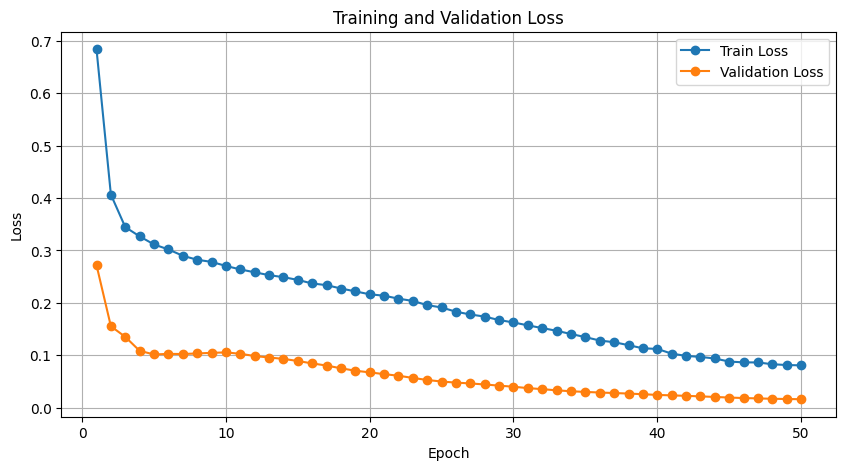

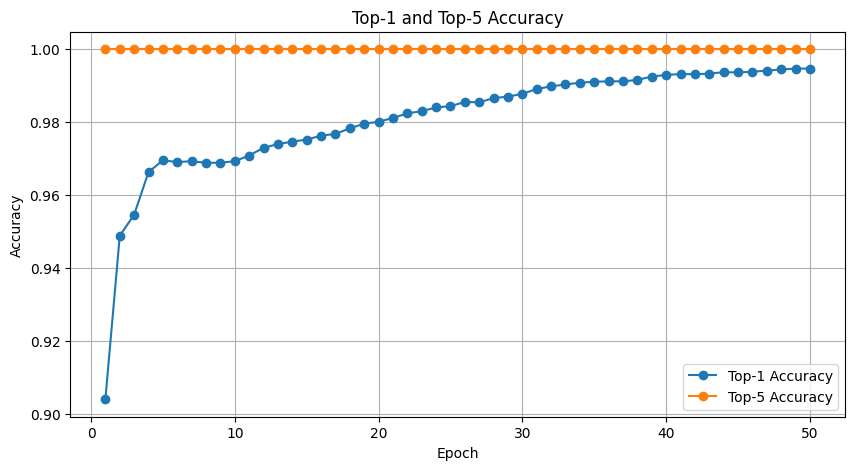

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the results.csv generated during training
results_path = 'runs/classify/yolov8_day_no_safedriving/results.csv'


# Load training results
results = pd.read_csv(results_path)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/loss'], label='Train Loss', marker='o')
plt.plot(results['epoch'], results['val/loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.savefig('runs/classify/yolov8_day_no_safedriving/loss_curve.png')
plt.show()

# Plot top-1 and top-5 accuracies
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/accuracy_top1'], label='Top-1 Accuracy', marker='o')
plt.plot(results['epoch'], results['metrics/accuracy_top5'], label='Top-5 Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy')
plt.legend()
plt.grid()
plt.savefig('runs/classify/yolov8_day_no_safedriving/accuracy_curve.png')
plt.show()

In [10]:
from google.colab import files
files.download("runs/classify/yolov8_day_no_safedriving/weights/last.pt")
files.download("runs/classify/yolov8_day_no_safedriving/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

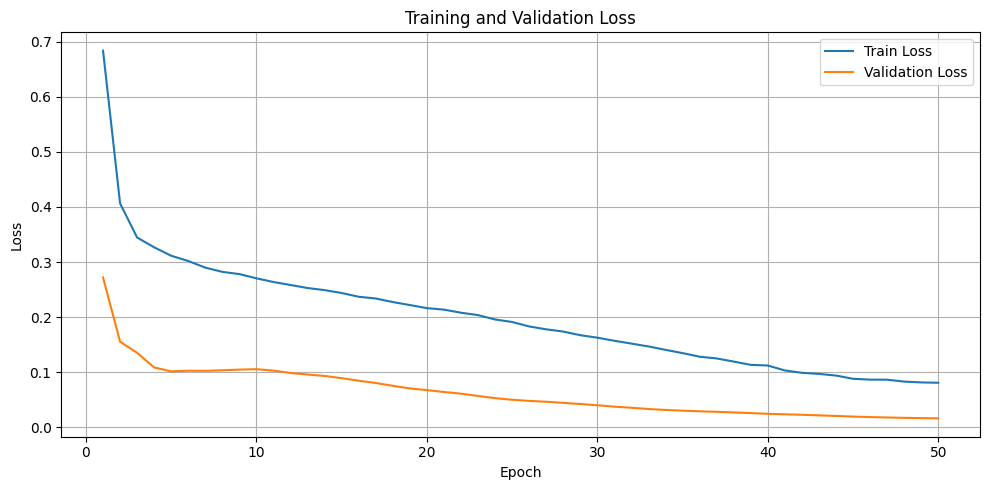

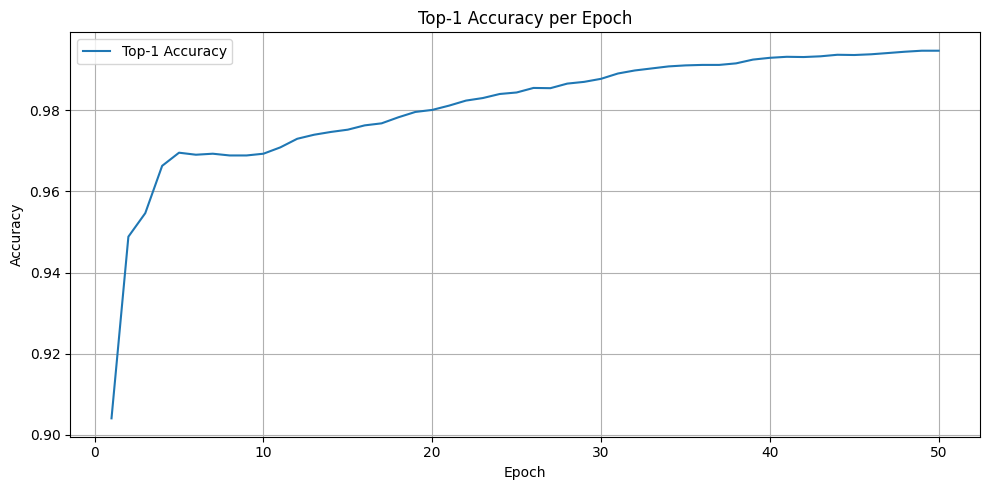

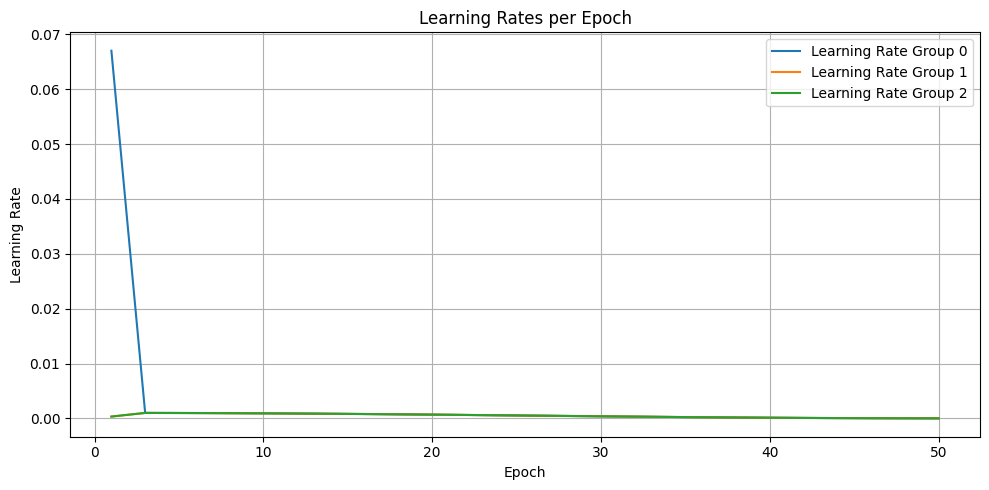

In [11]:
import matplotlib.pyplot as plt



# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/loss'], label='Train Loss')
plt.plot(results['epoch'], results['val/loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('loss_curve.png')
plt.show()



# Plot Top-1 Accuracy
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/accuracy_top1'], label='Top-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top-1 Accuracy per Epoch')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('accuracy_curve.png')
plt.show()



# Plot Learning Rates
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['lr/pg0'], label='Learning Rate Group 0')
plt.plot(results['epoch'], results['lr/pg1'], label='Learning Rate Group 1')
plt.plot(results['epoch'], results['lr/pg2'], label='Learning Rate Group 2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates per Epoch')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('learning_rate_curve.png')
plt.show()

In [12]:
from google.colab import files

# Download the generated plots
files.download('loss_curve.png')
files.download('accuracy_curve.png')
files.download('learning_rate_curve.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>